# Dataset overview:

The dataset comprises 10,127 records, spanning across 21 distinct columns.




### Dataset Attributes:

1. **CLIENTNUM**: A unique identifier for each customer, likely serving as the primary key for the dataset.

2. **Attrition_Flag**: This binary attribute indicates whether a customer has left the bank (Attrited Customer) or is still a customer (Existing Customer). It's the target variable for churn prediction models.

3. **Customer_Age**: The age of the customer, which could provide insights into the customer's lifecycle stage and banking needs.

4. **Gender**: The customer's gender (Male/Female), potentially influencing their banking behavior and product preferences.

5. **Dependent_count**: The number of dependents a customer has, which might affect their financial stability and needs.

6. **Education_Level**: The highest level of education attained by the customer, possibly correlating with income levels and investment behavior.

7. **Marital_Status**: Indicates whether the customer is Married, Single, Divorced, or falls into another category, impacting financial decisions and needs.

8. **Income_Category**: This categorizes customers into different income brackets, which could significantly influence their banking activities and risk of churn.

9. **Card_Category**: The type of bank card (Blue, Silver, Gold, Platinum) the customer holds, reflecting their engagement level and potentially their loyalty.

10. **Months_on_book**: How long (in months) the customer has been with the bank, indicating the depth of the customer-bank relationship.

11. **Months_Inactive_12_mon**: The number of months a customer has been inactive within the last year, a direct indicator of engagement and potential churn risk.

12. **Contacts_Count_12_mon**: How many times the customer has contacted the bank in the last 12 months, which could signal satisfaction or issues leading to churn.

13. **Credit_Limit**: The maximum credit amount available to the customer, which might correlate with the customer's income level and banking activity.

14. **Total_Revolving_Bal**: The total revolving balance on the customer’s account, indicating their credit utilization behavior.

15. **Avg_Open_To_Buy**: The difference between the credit limit and the revolving balance, showing the unused credit line available to the customer.

16. **Total_Amt_Chng_Q4_Q1**: Change in transaction amount from Q4 to Q1, offering insights into spending behavior changes over time.

17. **Total_Trans_Amt**: The total transaction amount in the last 12 months, a key indicator of the customer's banking activity.

18. **Total_Trans_Ct**: The total number of transactions in the last 12 months, further detailing the customer's engagement with the bank.

19. **Total_Ct_Chng_Q4_Q1**: Change in transaction count from Q4 to Q1, highlighting shifts in engagement levels.

20. **Avg_Utilization_Ratio**: The ratio of the total revolving balance to the credit limit, indicating how much of the available credit the customer is using.




# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
data = pd.read_csv('BankChurnersDataset.csv')
data.head(15)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
data.shape

(10127, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
#Summary Statistics
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:

duplicates_count = data.duplicated().sum()

duplicates_count


NameError: name 'df' is not defined

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
value_counts = {column: data[column].value_counts() for column in categorical_columns}

value_counts


{'Attrition_Flag': Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64,
 'Gender': F    5358
 M    4769
 Name: Gender, dtype: int64,
 'Education_Level': Graduate         3128
 High School      2013
 Unknown          1519
 Uneducated       1487
 College          1013
 Post-Graduate     516
 Doctorate         451
 Name: Education_Level, dtype: int64,
 'Marital_Status': Married     4687
 Single      3943
 Unknown      749
 Divorced     748
 Name: Marital_Status, dtype: int64,
 'Income_Category': Less than $40K    3561
 $40K - $60K       1790
 $80K - $120K      1535
 $60K - $80K       1402
 Unknown           1112
 $120K +            727
 Name: Income_Category, dtype: int64,
 'Card_Category': Blue        9436
 Silver       555
 Gold         116
 Platinum      20
 Name: Card_Category, dtype: int64}

## EDA

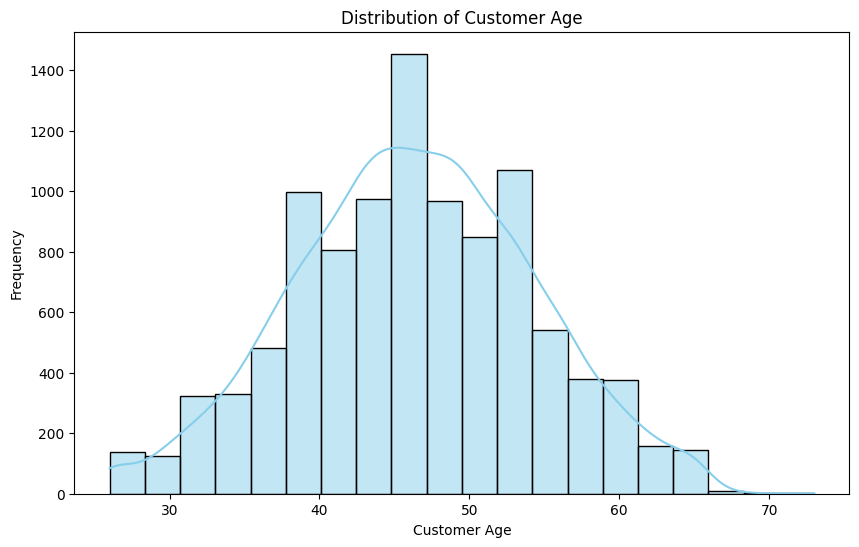

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer_Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

Observations:

- Distribution Shape: The 'Customer_Age' histogram appears to be fairly symmetrical, suggesting a normal-like distribution.
- Central Tendency: The age of customers clusters around the mid-40s, indicating this is the most common age group in the dataset.
- Spread: The age range extends from the mid-20s to early 70s, with a concentration of data points in the 40-55 age range.
- Outliers: There do not appear to be any significant outliers, as the distribution tails off smoothly at both ends.
- Overall Interpretation: The customer base seems to be middle-aged, with a balanced age distribution. This might reflect a broad appeal of the bank's services across different age groups.

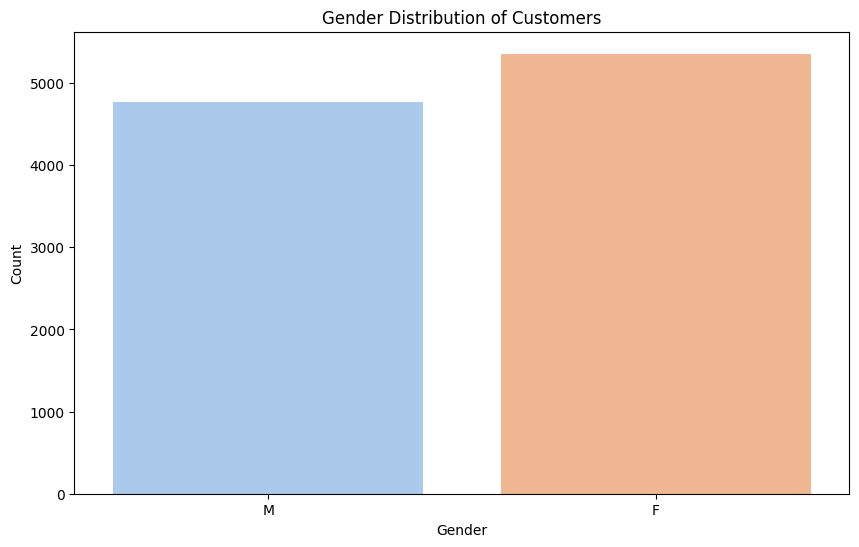

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=data, palette='pastel', hue='Gender', dodge=False)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Observations:

- Distribution: The graph illustrates the gender distribution of customers, categorized as 'M' (Male) and 'F' (Female).
- Gender Ratio: There is a slight predominance of female customers compared to male customers in the dataset.
- Balance: While not perfectly balanced, the gender distribution is relatively even, indicating a diverse customer base in terms of gender.
- Implications for Analysis: The relatively balanced gender distribution is beneficial for analyses that might be sensitive to gender proportions, such as customer behavior studies or targeted marketing strategies.
- Overall Interpretation: The distribution suggests that the bank’s customer base is quite diverse in terms of gender, which might reflect the bank's broad appeal across different gender demographics.

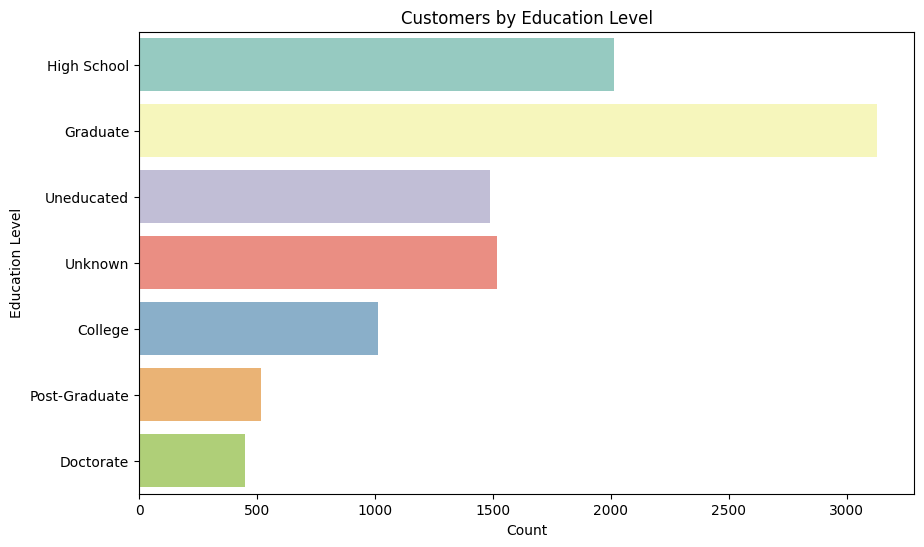

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(y='Education_Level', data=data, palette='Set3', hue='Education_Level', dodge=False)
plt.title('Customers by Education Level')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


Observations:

- Distribution: The graph shows a variety of education levels among the bank's customers, with a significant portion having achieved a graduate level education.
- Common Education Levels: High School and Graduate are common, indicating a broad range of educational backgrounds.
- Variation: Noticeable decrease in frequency beyond the Graduate level, with fewer customers holding post-graduate qualifications.
- Overall Interpretation: The diverse educational background of customers may influence their banking needs and preferences.

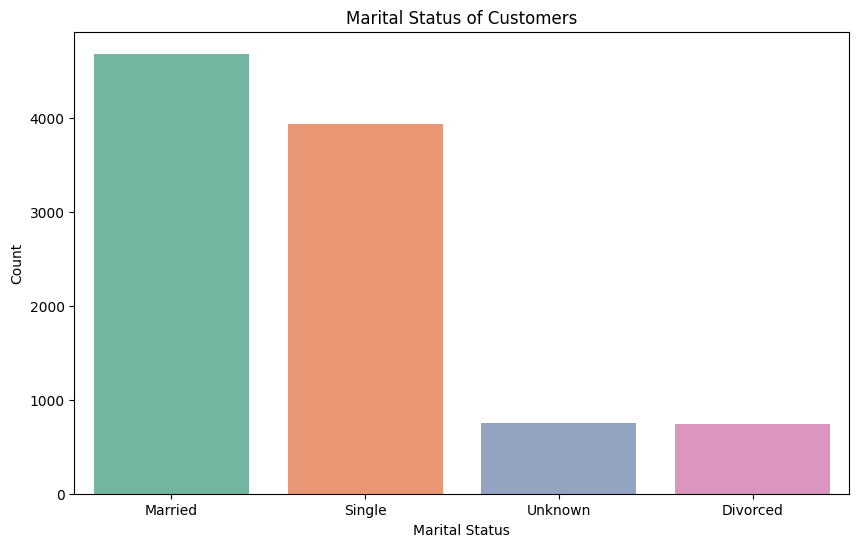

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=data, palette='Set2', hue='Marital_Status', dodge=False)
plt.title('Marital Status of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Observations:

- Distribution: The graph presents the marital status of customers, revealing a mix of single, married, and divorced individuals.
- Most Common Status: Married status is the most common, suggesting that a significant portion of the customer base may have joint financial interests or family-oriented financial needs.
- Variation: Single and Divorced statuses are less common but represent a notable segment of the customer base.
- Overall Interpretation: Understanding the marital status distribution can help the bank tailor its products and services to meet the needs of different life stages.

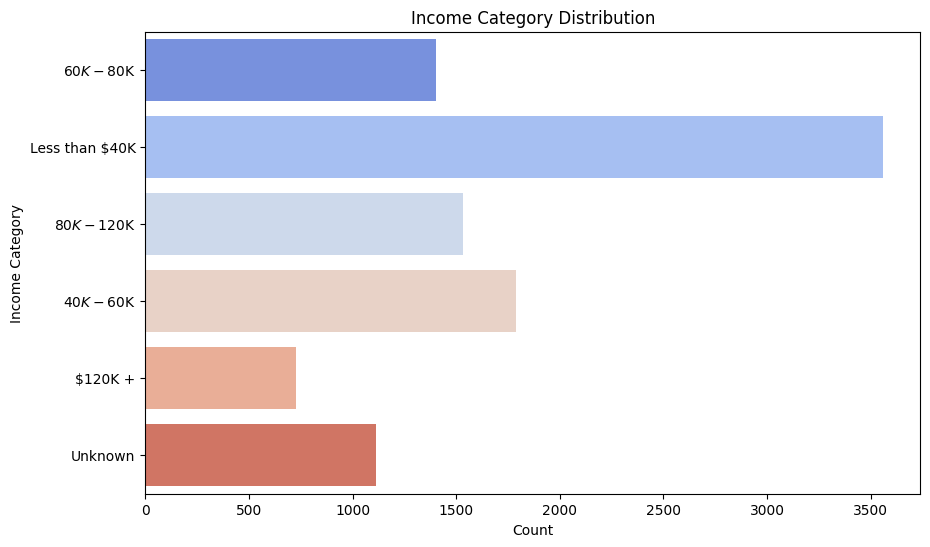

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Income_Category', data=data, palette='coolwarm', hue='Income_Category', dodge=False)
plt.title('Income Category Distribution')
plt.xlabel('Count')
plt.ylabel('Income Category')
plt.show()

Observations:

- Distribution: Displays the income categories of customers, indicating the economic diversity within the bank's customer base.
- Income Range: Spans from Less than \$40K to \$120K+, with a significant number of customers in the lower income brackets.
- Skewness: The distribution is skewed towards lower income categories, suggesting the bank serves a wide range of economic demographics.
- Overall Interpretation: The income distribution provides insights into the financial positioning of customers, which can inform targeted marketing and service development.

<ipython-input-64-8de3dc8e6857>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Card_Category', data=data, palette='autumn')


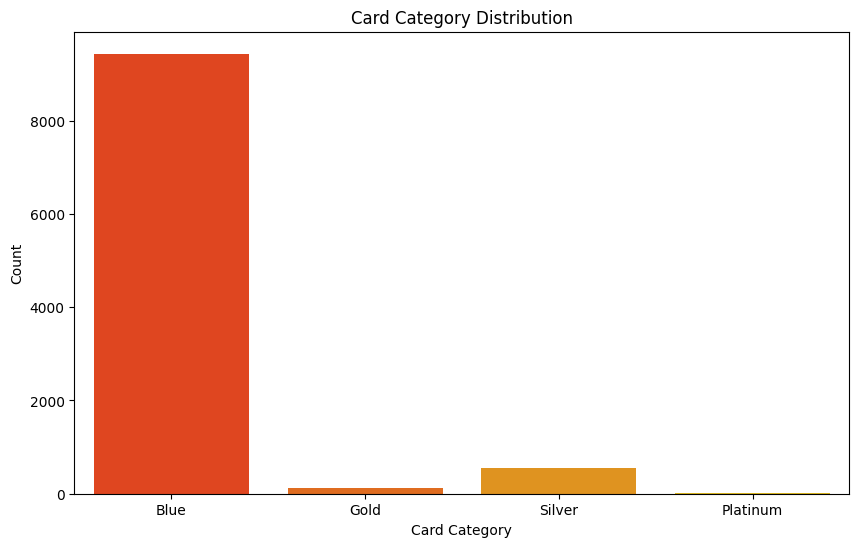

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', data=data, palette='autumn')
plt.title('Card Category Distribution')
plt.xlabel('Card Category')
plt.ylabel('Count')
plt.show()


Observations:

- Distribution: Highlights the types of cards customers use, such as Blue, Silver, Gold, and Platinum.
- Card Preferences: A vast majority opt for the Blue card, with progressively fewer customers using the more premium card types.
- Skewness: The distribution is highly skewed towards the Blue card, indicating a preference for basic card services.
- Overall Interpretation: The bank's customer base predominantly prefers the Blue card, which may suggest a focus on essential card services or a potential opportunity to promote premium cards.

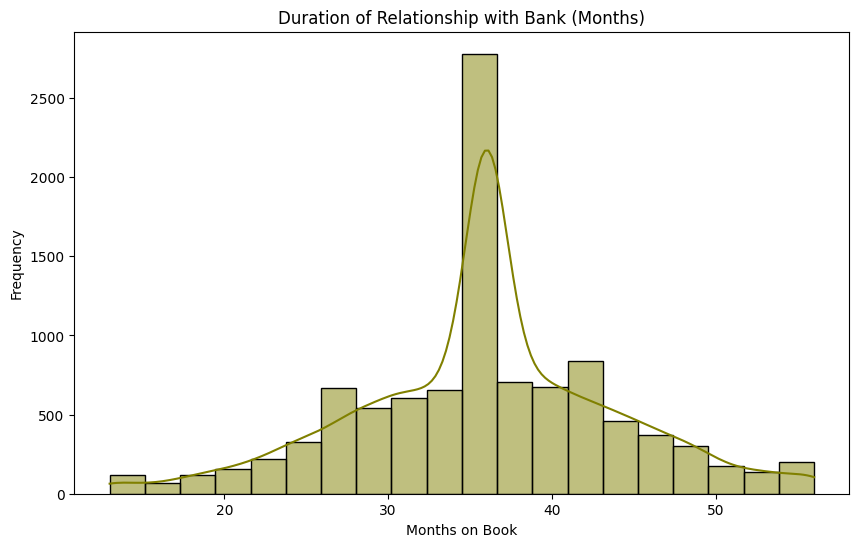

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Months_on_book'], bins=20, kde=True, color='olive')
plt.title('Duration of Relationship with Bank (Months)')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.show()

Observations:

- Distribution Shape: The histogram shows a bell-shaped distribution centered around a medium-term relationship duration with the bank.
- Central Tendency: The aggregation of data points around the middle of the range indicates that the average customer has been with the bank for a moderate duration.
- Spread: The distribution spans a broad range, from new clients to those with longstanding relationships.
- Outliers: There are few to no extreme values, suggesting that customers do not significantly deviate from the average relationship duration.
- Overall Interpretation: The bank has a stable customer base, with most customers maintaining their relationship for a similar period, possibly reflecting satisfaction with the bank's services.

<ipython-input-66-e1e10835c2b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Total_Relationship_Count', data=data, palette='spring')


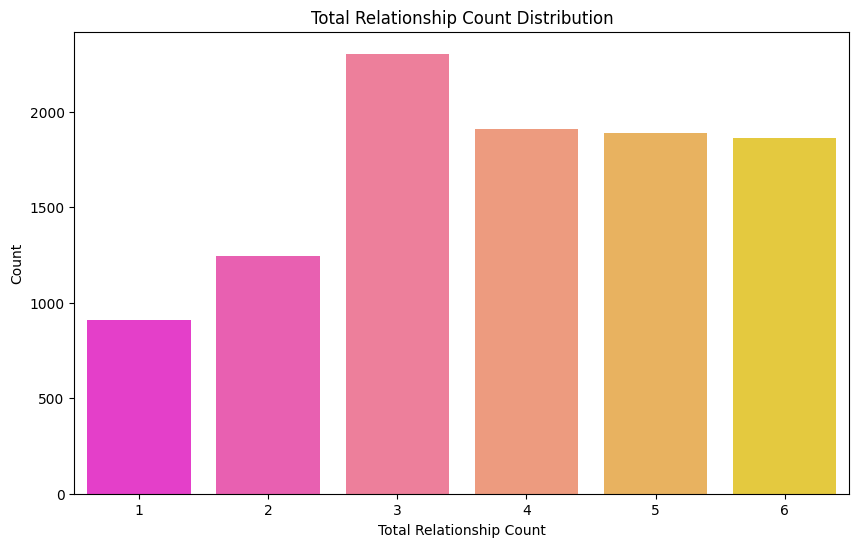

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Relationship_Count', data=data, palette='spring')
plt.title('Total Relationship Count Distribution')
plt.xlabel('Total Relationship Count')
plt.ylabel('Count')
plt.show()

Observation:

- Distribution Shape: The count plot reveals a high frequency of customers with three to four product relationships with the bank.
- Central Tendency: The most common relationship counts suggest that the average customer engages with multiple services.
- Spread: A decreasing frequency for higher relationship counts may indicate fewer cross-selling successes for additional products.
- Outliers: There are no apparent outliers, reflecting a standard customer engagement level.
- Overall Interpretation: The bank’s customers tend to engage with several products, indicating opportunities for increasing product penetration and cross-selling.

<ipython-input-67-ee4e3b8f67ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=data, palette='summer')


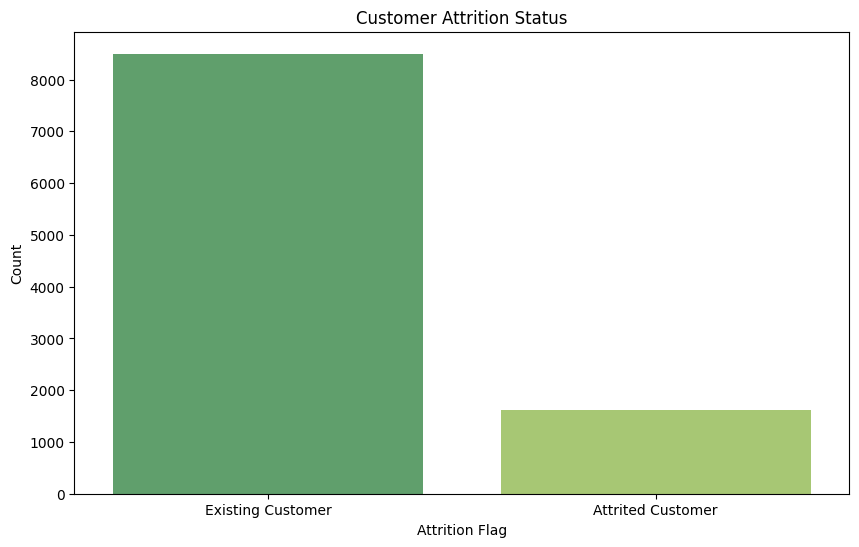

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Attrition_Flag', data=data, palette='summer')
plt.title('Customer Attrition Status')
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()



Observations:

- Distribution Shape: The plot shows a large disparity between existing and attrited customers, with existing customers far outnumbering those who have left.
- Central Tendency: The high count of existing customers suggests successful customer retention strategies.
- Spread: The low number of attrited customers indicates that customer churn is relatively uncommon.
- Outliers: The distribution lacks significant outliers, suggesting a stable customer base.
- Overall Interpretation: The bank has been effective in maintaining its customer base, although the presence of attrited customers points to areas where retention efforts can be improved.

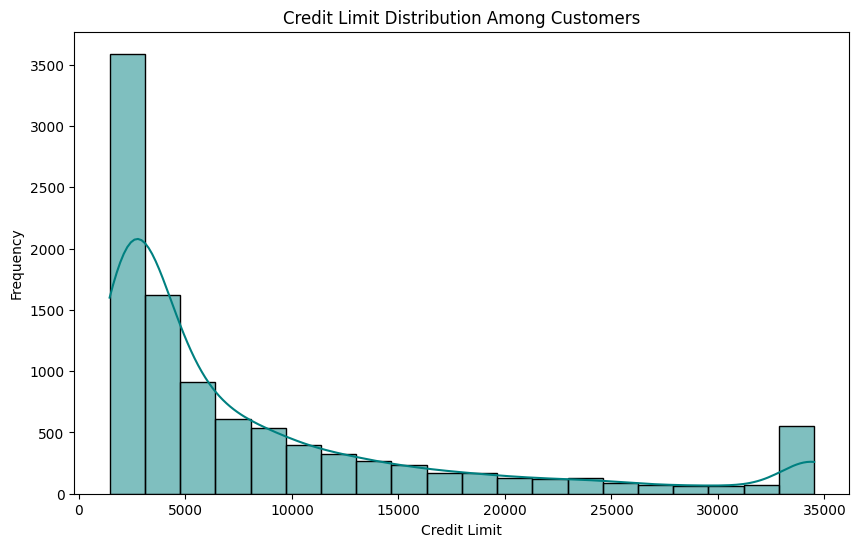

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Credit_Limit'], bins=20, kde=True, color='teal')
plt.title('Credit Limit Distribution Among Customers')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()


Observations:

- Distribution Shape: The distribution of 'Credit_Limit' is right-skewed, indicating that a majority of customers have lower credit limits, while a smaller number have significantly higher limits.
- Central Tendency: The mean credit limit is higher than the median, which is pulled up by high-value outliers.
- Spread: The credit limits range broadly from low to very high values, suggesting diverse financial standings among customers.
- Outliers: High-value outliers are present, indicating some customers with exceptionally high credit limits.
- Overall Interpretation: The bank serves customers with varying credit needs, from those with modest credit requirements to those with substantial credit lines.

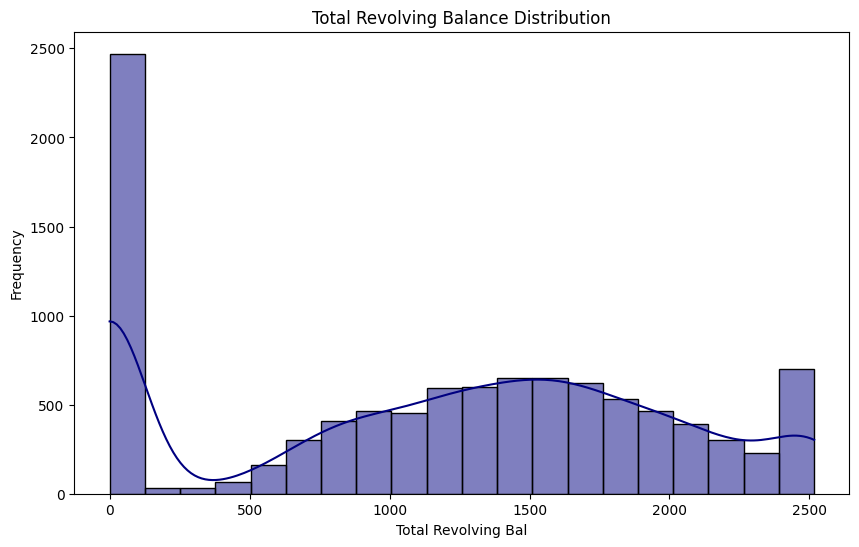

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Revolving_Bal'], bins=20, kde=True, color='navy')
plt.title('Total Revolving Balance Distribution')
plt.xlabel('Total Revolving Bal')
plt.ylabel('Frequency')
plt.show()


Observations:

- Distribution Shape: The 'Total_Revolving_Bal' has a multimodal distribution, with several peaks indicating common balance levels.
Central Tendency: The presence of multiple peaks affects the mean and median, which may not accurately represent the most common balance levels.
- Spread: The balances range widely, with many customers maintaining low revolving balances.
- Outliers: Some customers have very high revolving balances, but they are not excessively distant from the rest of the data.
- Overall Interpretation: Customers exhibit diverse usage of revolving credit, with a significant number either paying off their balances or not using their credit regularly.


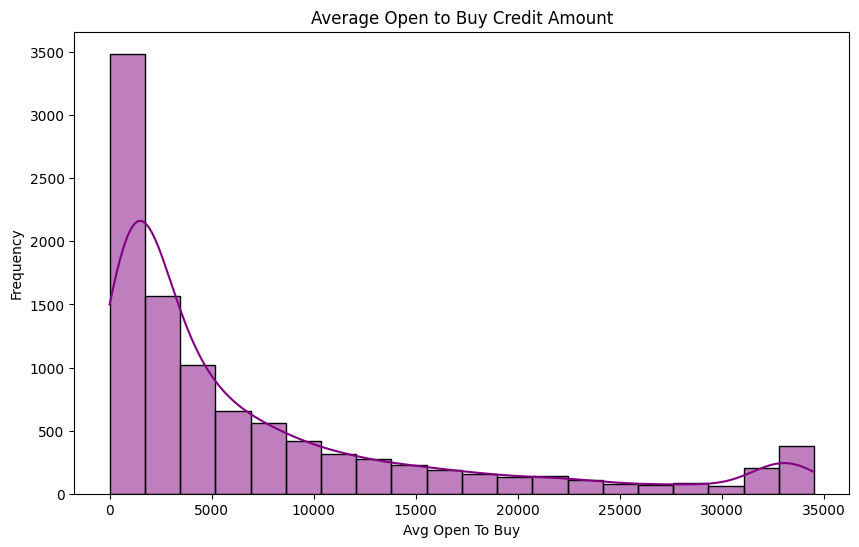

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Open_To_Buy'], bins=20, kde=True, color='purple')
plt.title('Average Open to Buy Credit Amount')
plt.xlabel('Avg Open To Buy')
plt.ylabel('Frequency')
plt.show()


Observations:

- Distribution Shape: The 'Avg_Open_To_Buy' distribution is right-skewed, with many customers having lower amounts of unused credit.
- Central Tendency: The mean is notably higher than the median, reflecting the skewness of the distribution.
- Spread: There is a wide range of 'Avg_Open_To_Buy' values, with some customers having very high amounts of available credit.
- Outliers: Customers with exceptionally high 'Avg_Open_To_Buy' values are present, likely due to high credit limits or conservative credit use.
- Overall Interpretation: Most customers maintain lower levels of unused credit, but a segment has significantly higher credit availability.

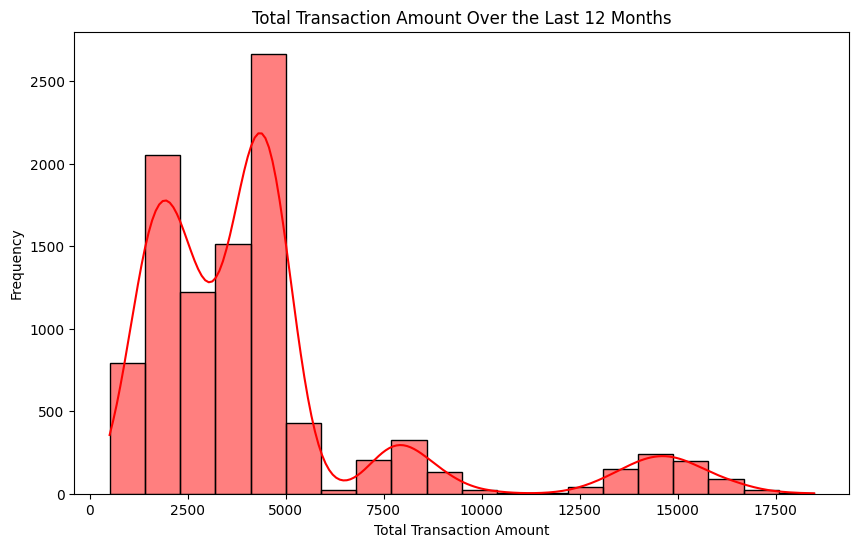

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Trans_Amt'], bins=20, kde=True, color='red')
plt.title('Total Transaction Amount Over the Last 12 Months')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()


Observations:

- Distribution Shape: The 'Total_Trans_Amt' distribution is right-skewed, indicating that most customers have lower transaction amounts.
- Central Tendency: The mean transaction amount is higher than the median, influenced by customers with higher transaction volumes.
- Spread: The transaction amounts vary widely, with some customers having very high total transaction amounts.
- Outliers: There are outliers with very high transaction amounts, potentially reflecting a small group of customers with high spending.
- Overall Interpretation: While most customers have modest transaction volumes, a subset engages in more significant spending.

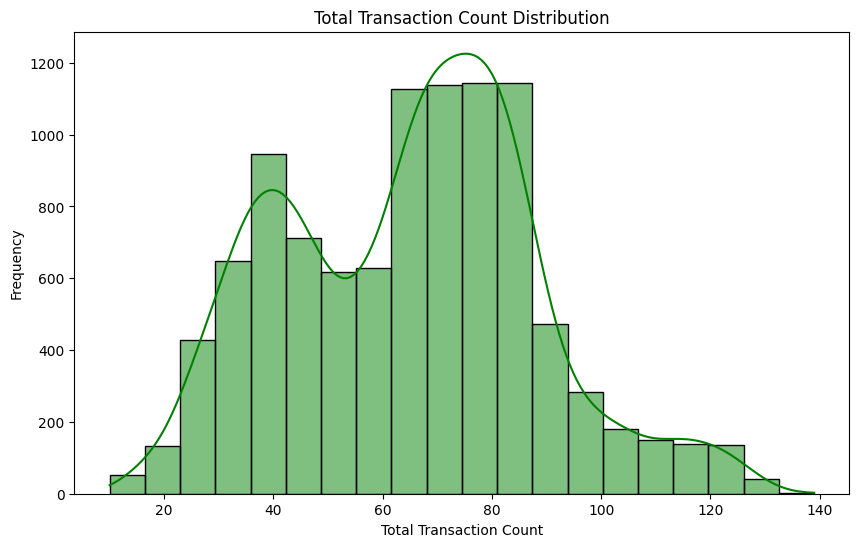

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Total_Trans_Ct'], bins=20, kde=True, color='green')
plt.title('Total Transaction Count Distribution')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')
plt.show()


Observations:

- Distribution Shape: The 'Total_Trans_Ct' distribution is somewhat bimodal, indicating common transaction count ranges.
- Central Tendency: The mean and median are closely aligned, suggesting a balanced distribution around the central transaction counts.
- Spread: The transaction counts are varied, reflecting diverse transaction behaviors among customers.
- Outliers: There are no significant outliers; most transaction counts fall within a typical range.
- Overall Interpretation: The distribution points to two distinct customer groups based on transaction frequency, indicating different patterns of bank usage.

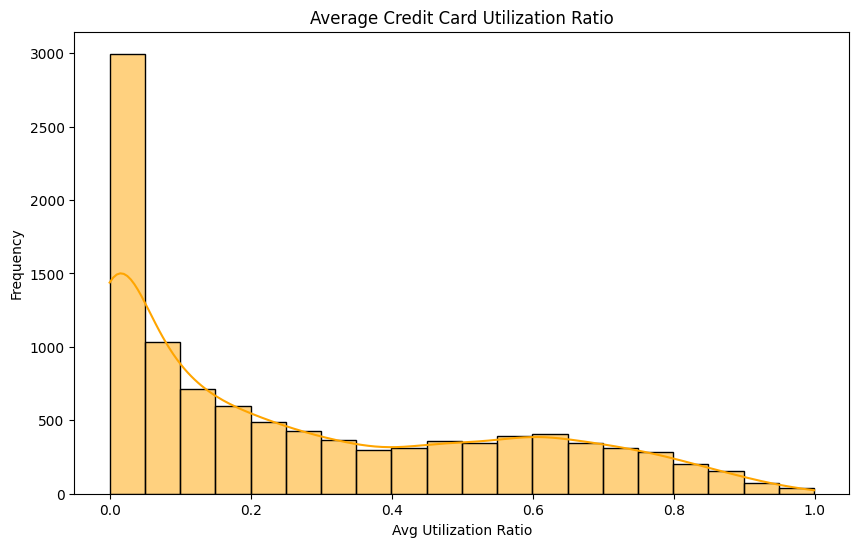

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Utilization_Ratio'], bins=20, kde=True, color='orange')
plt.title('Average Credit Card Utilization Ratio')
plt.xlabel('Avg Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


Observations:

- Distribution Shape: The 'Avg_Utilization_Ratio' distribution is bimodal, with peaks at lower and higher utilization ratios.
- Central Tendency: Both the mean and median are influenced by the two distinct peaks in the distribution.
- Spread: The utilization ratio ranges from 0 to just under 1.0, highlighting varying credit use levels among customers.
- Outliers: No significant outliers are observed, with most values within a standard range for utilization ratios.
- Overall Interpretation: The customer base is divided into two - segments: those who use a low proportion of their credit and those with higher utilization, indicating different credit management behaviors.

<ipython-input-74-068de6e81c6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


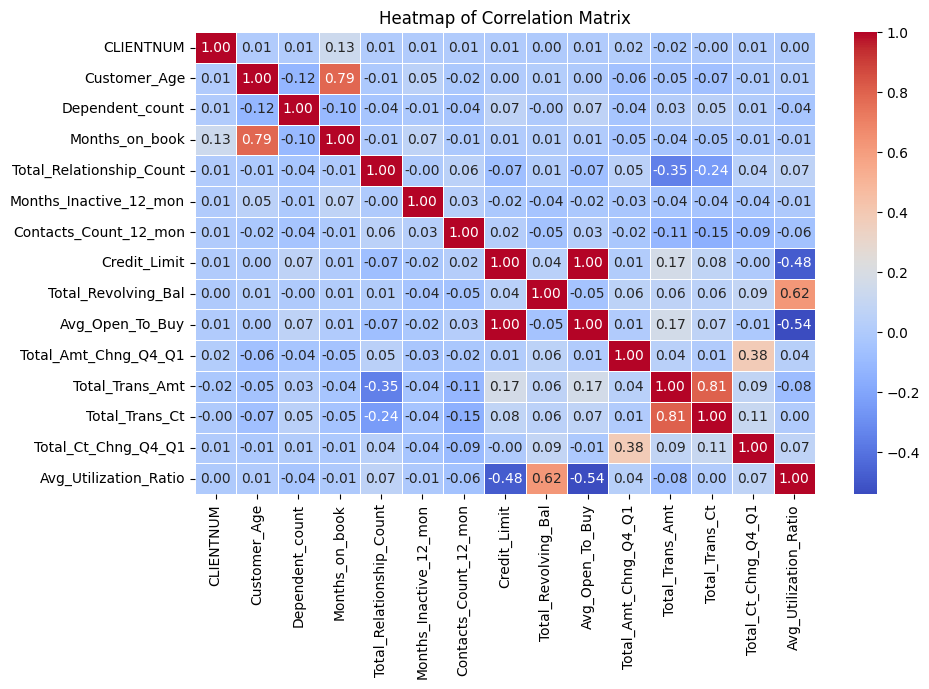

In [ ]:

correlation_matrix = data.corr()

# Heatmap for the correlation matrix to visualize the relationships between all numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()





- Visualization: The heatmap offers a comprehensive view of the correlations between all numerical variables in the dataset. The color intensity represents the strength and direction of the correlation, with warmer colors indicating positive correlations and cooler colors showing negative correlations.
- Insight: This allows us to quickly identify which pairs of variables are most strongly correlated, aiding in the identification of potential relationships or redundancies within the dataset.

<ipython-input-75-dd7bafd05606>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Age_Group', y='Total_Trans_Amt', data=data, palette="Set2")


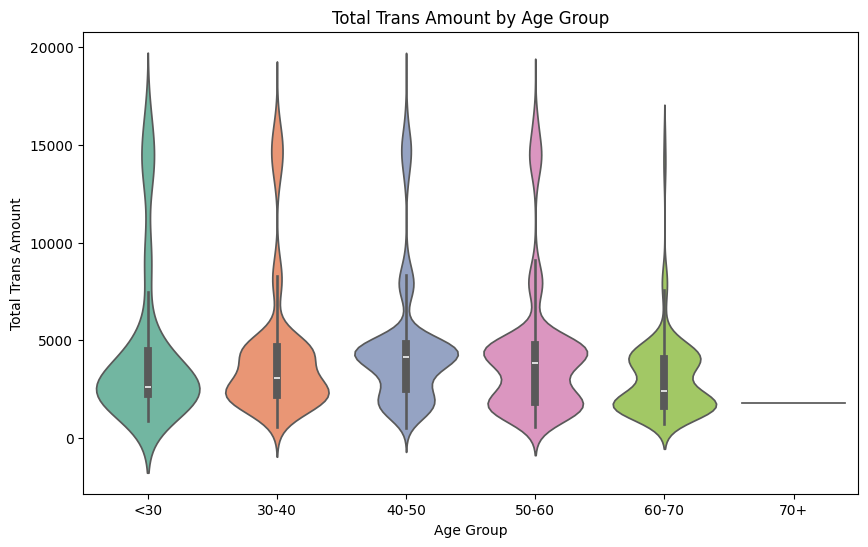

In [ ]:

data['Age_Group'] = pd.cut(data['Customer_Age'], bins=[0, 30, 40, 50, 60, 70, 80], labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])

plt.figure(figsize=(10, 6))
sns.violinplot(x='Age_Group', y='Total_Trans_Amt', data=data, palette="Set2")
plt.title('Total Trans Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Trans Amount')
plt.show()

- Visualization: The violin plot also categorizes customers by age and visualizes the distribution of total transaction amounts for each group, combining aspects of box plots with a kernel density estimation.
- Insight: This provides a more nuanced view of the total transaction amounts across age groups, showing not only the central tendency and variability but also the distribution shape. It can reveal, for example, if certain age groups have more uniform spending patterns or if there are subgroups within the ages that behave differently.

In [ ]:
data.drop(axis=1,columns='Age_Group', inplace = True)

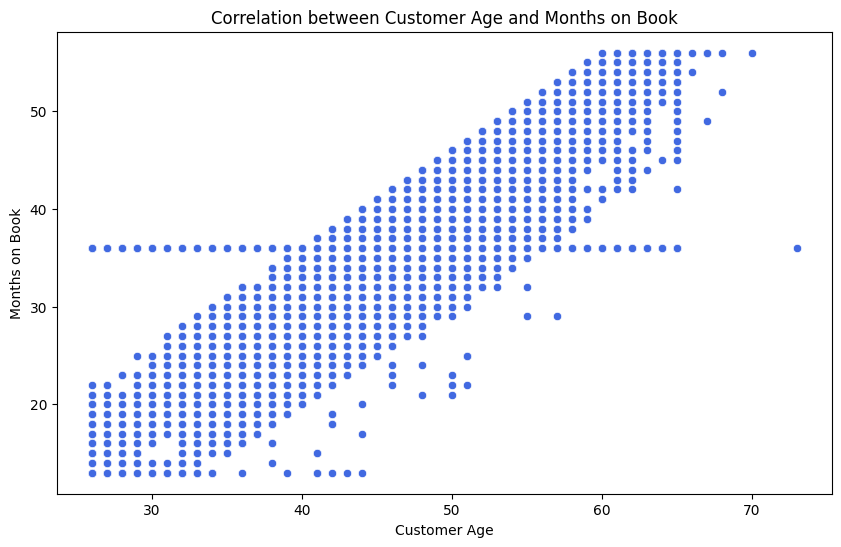

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Customer_Age', y='Months_on_book', color="royalblue")
plt.title('Correlation between Customer Age and Months on Book')
plt.xlabel('Customer Age')
plt.ylabel('Months on Book')
plt.show()

- Visualization: A scatterplot showcasing the relationship between 'Customer Age' and 'Months on Book', highlighted in royal blue for easy visualization.
- Insight: Demonstrates a positive linear correlation, indicating older customers tend to have longer relationships with the bank. This suggests loyalty increases with age, providing valuable information for customer retention strategies.

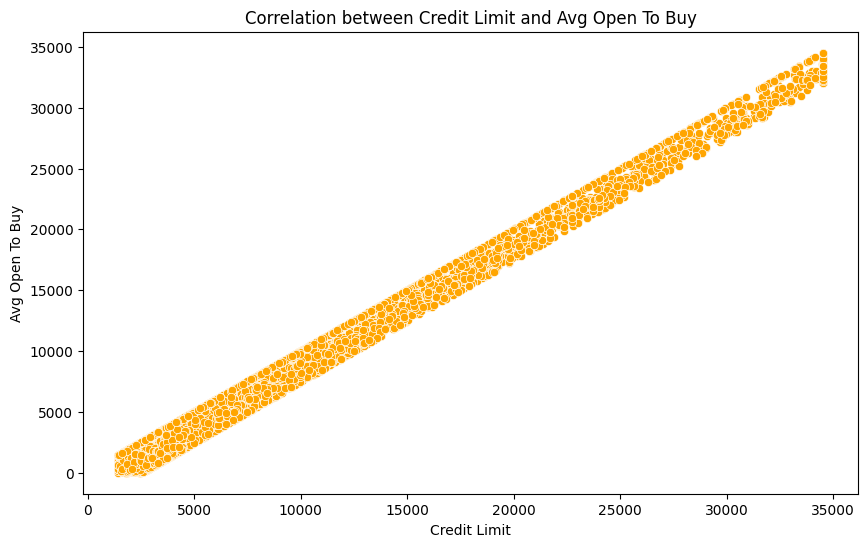

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Credit_Limit', y='Avg_Open_To_Buy', color="orange")
plt.title('Correlation between Credit Limit and Avg Open To Buy')
plt.xlabel('Credit Limit')
plt.ylabel('Avg Open To Buy')
plt.show()

- Visualization: Scatterplot displaying the relationship between 'Credit Limit' and 'Avg Open To Buy', marked in vibrant orange.
- Insight: Reveals a strong positive correlation, indicating that customers with higher credit limits generally have more available credit. This relationship underscores the financial behavior of customers and can guide credit management policies.

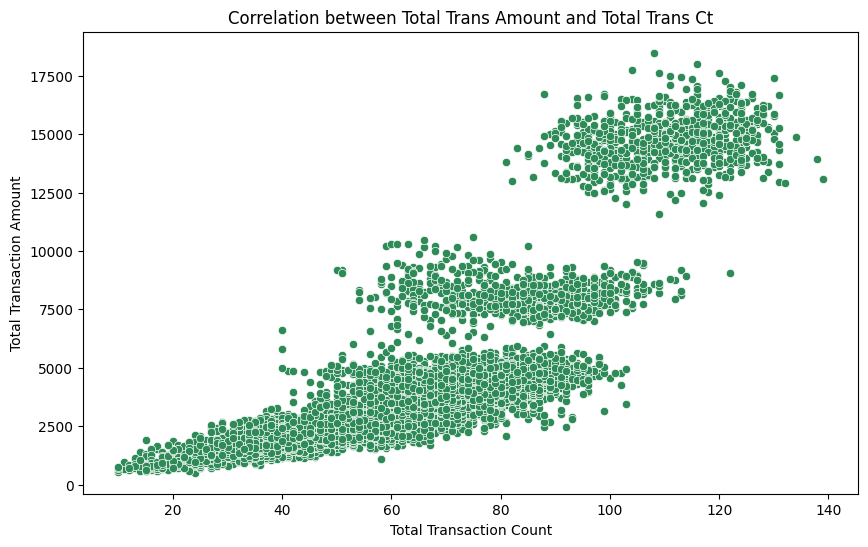

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total_Trans_Ct', y='Total_Trans_Amt', color="seagreen")
plt.title('Correlation between Total Trans Amount and Total Trans Ct')
plt.xlabel('Total Transaction Count')
plt.ylabel('Total Transaction Amount')
plt.show()

- Visualization: A scatterplot illustrating the relationship between 'Total Transaction Count' and 'Total Transaction Amount', in a distinct sea green.
- Insight: Shows a very strong positive correlation, suggesting that an increase in the number of transactions correlates with an increase in the total amount spent. This insight is crucial for identifying highly engaged customers and tailoring marketing strategies to boost transaction activities.

## Data Preprocessing

In [ ]:
# droping column
data = data.drop('CLIENTNUM', axis=1)

In [ ]:
missing_values = data.isnull().sum()
placeholders = data.isin(['Unknown', 'NA', 'N/A', '?', '-']).sum()

detailed_missing_placeholder_report = pd.DataFrame({
    'Data Types': data.dtypes,
    'Missing Values': missing_values,
    'Placeholders': placeholders
})

detailed_missing_placeholder_report


,Data Types,Missing Values,Placeholders
Attrition_Flag,object,0,0
Customer_Age,int64,0,0
Gender,object,0,0
Dependent_count,int64,0,0
Education_Level,object,0,1519
Marital_Status,object,0,749
Income_Category,object,0,1112
Card_Category,object,0,0
Months_on_book,int64,0,0
Total_Relationship_Count,int64,0,0




The dataset is meticulously curated, ensuring the absence of missing values and duplicates. However, an examination reveals the presence of 'Unknown' placeholders across several key categorical columns:

- `Education_Level`: Contains 1,519 entries marked 'Unknown'.
- `Marital_Status`: Contains 749 entries marked 'Unknown'.
- `Income_Category`: Contains 1,112 entries marked 'Unknown'.

Addressing these 'Unknown' entries is crucial to maintaining the dataset's integrity, as they could potentially skew analysis and modeling efforts. Several strategies for managing these entries include:

1. **Imputation with Mode**: This method involves replacing 'Unknown' entries with the most frequently occurring category within each column. This technique, grounded in the principle of central tendency, ensures the preservation of the dataset's original distribution.

2. **Model Imputation**: Another approach is to treat 'Unknown' as a distinct category, based on the assumption that these entries might exhibit unique patterns or hold specific significance.

3. **Exclusion**: Removing records containing 'Unknown' values is another strategy, though it is generally considered less favorable due to the potential reduction in dataset size and the introduction of bias.

Given the dataset's limited size, the exclusion method has been deemed inappropriate. Initial attempts at model imputation using a Decision Tree algorithm yielded suboptimal results. Consequently, the decision has been made to proceed with the imputation of 'Unknown' entries with the mode for each respective column. This approach is both pragmatic and widely adopted in data preprocessing, ensuring minimal disruption to the dataset's underlying structure.


In [ ]:
cols_for_update = ['Education_Level', 'Marital_Status', 'Income_Category']

# Imputing 'Unknown' values with the mode in each specified column
print("Modes of each column ")
for col in cols_for_update:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('Unknown', mode_value)
    print(col,":" ,mode_value)
# Constructing a dictionary to check for the presence of 'Unknown' values post-imputation
remaining_unknowns = {col: data[col][data[col] == 'Unknown'].count() for col in cols_for_update}
print("\n")
remaining_unknowns

Modes of each column 
Education_Level : Graduate
Marital_Status : Married
Income_Category : Less than $40K




{'Education_Level': 0, 'Marital_Status': 0, 'Income_Category': 0}

In [ ]:
data.head(15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Graduate,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Married,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
nominal_features = ['Gender', 'Marital_Status', 'Card_Category']
ordinal_features = ['Education_Level', 'Income_Category']


one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[nominal_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out())

data[ordinal_features] = data[ordinal_features].apply(LabelEncoder().fit_transform)

encoded_data = pd.concat([data.drop(nominal_features, axis=1), one_hot_encoded_df], axis=1)
encoded_data.head(15)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,3,2,39,5,1,3,12691.0,...,0.061,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Existing Customer,49,5,2,4,44,6,1,2,8256.0,...,0.105,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,Existing Customer,51,3,2,3,36,4,1,0,3418.0,...,0.000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Existing Customer,40,4,3,4,34,3,4,1,3313.0,...,0.760,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Existing Customer,40,3,5,2,21,5,1,0,4716.0,...,0.000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,Existing Customer,44,2,2,1,36,3,1,2,4010.0,...,0.311,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,Existing Customer,51,4,2,0,46,6,1,3,34516.0,...,0.066,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,Existing Customer,32,0,3,2,27,2,2,2,29081.0,...,0.048,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,Existing Customer,37,3,5,2,36,5,2,0,22352.0,...,0.113,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Existing Customer,48,2,2,3,36,6,3,3,11656.0,...,0.144,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
label_encoder = LabelEncoder()
encoded_data['Attrition_Flag'] = label_encoder.fit_transform(encoded_data['Attrition_Flag'])
X = encoded_data.drop('Attrition_Flag', axis=1)
y = encoded_data['Attrition_Flag']

# Applying SMOTE to handle class imbalance by oversampling the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((17000, 25), (17000,))

In [ ]:
AfSmote_Data = pd.concat([X_resampled, y_resampled], axis=1)